In [1]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

In [2]:
# prepare mutli-class classification dataset
def create_dataset():
    X, y = make_blobs(n_samples = 1000, centers = 20, n_features = 100, cluster_std = 2, random_state = 19)
    y = to_categorical(y)
    n_train = 500
    trainX, testX = X[:n_train, :],X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy 

In [3]:
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    model = Sequential()
    model.add(Dense(n_nodes, input_dim = n_input, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(n_classes, activation = "softmax"))
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])
    history = model.fit(trainX, trainy, epochs = 100, verbose = 0)
    _, test_acc = model.evaluate(testX, testy, verbose = 0)
    return history, test_acc

C:\Users\PRADYUMNA PS\anaconda4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


nodes = 1: 0.082
nodes = 2: 0.300
nodes = 3: 0.608
nodes = 4: 0.894
nodes = 5: 0.994
nodes = 6: 0.998
nodes = 7: 1.000


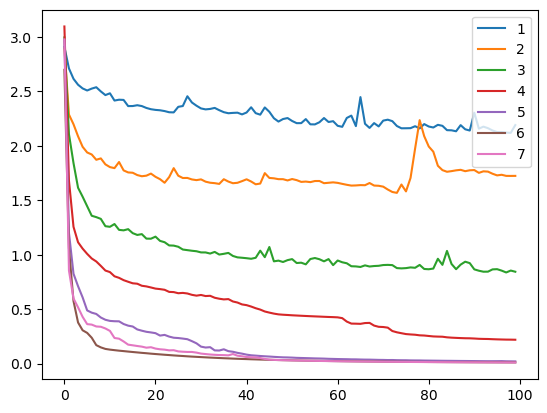

In [4]:
trainX, trainy, testX, testy = create_dataset()
num_nodes = [1,2,3,4,5,6,7]
for n_nodes in num_nodes:
    history, result = evaluate_model(n_nodes  ,trainX, trainy, testX, testy)
    print('nodes = %d: %.3f' % (n_nodes, result))
    pyplot.plot(history.history["loss"], label = str(n_nodes))
pyplot.legend()
pyplot.show()